In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [4]:
img_show = Image.open('/kaggle/input/test-himalaya-img/46_QS2817970_AddVisibilityImg-20240423_101925.jpg14216.png') 
img = cv2.imread('/kaggle/input/test-himalaya-img/46_QS2817970_AddVisibilityImg-20240423_101925.jpg14216.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
RGB_img.shape

(155, 57, 3)

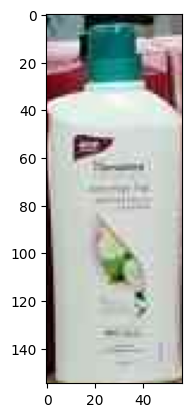

In [6]:
plt.imshow(RGB_img)

In [45]:
img

array([[[149, 145, 117],
        [173, 169, 141],
        [163, 159, 131],
        ...,
        [114, 113, 115],
        [116, 114, 120],
        [118, 116, 122]],

       [[ 93,  89,  61],
        [147, 143, 115],
        [155, 151, 123],
        ...,
        [113, 112, 114],
        [116, 114, 120],
        [117, 115, 121]],

       [[ 26,  22,   0],
        [ 71,  67,  39],
        [136, 132, 104],
        ...,
        [119, 118, 120],
        [119, 117, 123],
        [118, 116, 122]],

       ...,

       [[ 47,  45,  67],
        [ 57,  56,  76],
        [ 68,  68,  84],
        ...,
        [174, 192, 199],
        [166, 185, 193],
        [141, 162, 170]],

       [[ 64,  73,  93],
        [ 62,  72,  90],
        [ 63,  72,  86],
        ...,
        [126, 144, 155],
        [103, 120, 133],
        [ 76,  95, 110]],

       [[ 81, 110, 125],
        [ 69,  98, 112],
        [ 57,  84,  98],
        ...,
        [ 70,  86, 103],
        [ 94, 109, 128],
        [119, 133, 156]]

In [7]:
lab_img = cv2.cvtColor(img.astype("float32") / 255, cv2.COLOR_BGR2LAB)
lab_img

array([[[58.184814, -9.      , -5.40625 ],
        [67.27295 , -8.671875, -5.25    ],
        [63.531494, -8.75    , -5.28125 ],
        ...,
        [47.67456 ,  0.984375, -0.265625],
        [48.449707,  2.71875 , -0.265625],
        [49.249268,  2.703125, -0.265625]],

       [[35.717773, -9.1875  , -5.609375],
        [57.41577 , -9.015625, -5.40625 ],
        [60.46753 , -8.953125, -5.375   ],
        ...,
        [47.27173 ,  0.96875 , -0.265625],
        [48.449707,  2.71875 , -0.265625],
        [48.846436,  2.71875 , -0.265625]],

       [[ 5.908203, -5.921875, -5.078125],
        [26.348877, -9.234375, -5.734375],
        [53.16162 , -9.09375 , -5.484375],
        ...,
        [49.658203,  0.96875 , -0.28125 ],
        [49.645996,  2.703125, -0.265625],
        [49.249268,  2.703125, -0.265625]],

       ...,

       [[21.057129, 10.453125,  2.796875],
        [25.646973,  9.046875,  2.84375 ],
        [30.389404,  6.859375,  2.59375 ],
        ...,
        [77.72217 , -0.625

In [8]:
lab_img.reshape(155 * 57, 3)

array([[58.184814, -9.      , -5.40625 ],
       [67.27295 , -8.671875, -5.25    ],
       [63.531494, -8.75    , -5.28125 ],
       ...,
       [37.6709  ,  4.328125, 11.90625 ],
       [47.29004 ,  5.203125, 11.203125],
       [57.226562,  6.375   , 11.03125 ]], dtype=float32)

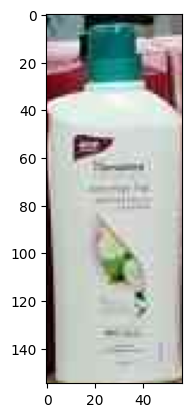

In [9]:
plt.imshow(cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB))

In [10]:
print(min(lab_img.reshape(3, 155 * 57)[0]), max(lab_img.reshape(3, 155 * 57)[0]))
print(min(lab_img.reshape(3, 155 * 57)[1]), max(lab_img.reshape(3, 155 * 57)[1]))
print(min(lab_img.reshape(3, 155 * 57)[2]), max(lab_img.reshape(3, 155 * 57)[2]))

-35.75 99.523926
-26.78125 97.021484
-30.578125 92.21802


In [11]:

k = 4
kmeans_cluster = KMeans(n_clusters = k, 
                        n_init = 20)

In [12]:
kmeans_cluster.fit(lab_img.reshape(155 * 57, 3))

KMeans(n_clusters=4, n_init=20)

In [13]:
from sklearn.decomposition import PCA

centroids = kmeans_cluster.cluster_centers_ 
print(centroids)

[[ 62.0717       5.3155723    1.796551  ]
 [ 16.515598    16.09745      5.917646  ]
 [ 83.83017     -2.8693247    2.6008146 ]
 [ 42.672516   -21.7192      -0.08408403]]


In [14]:
lab_img.reshape(3, 155 * 57)[0].shape

(8835,)

In [15]:
RGB_img.reshape(3, 155 * 57).shape

(3, 8835)

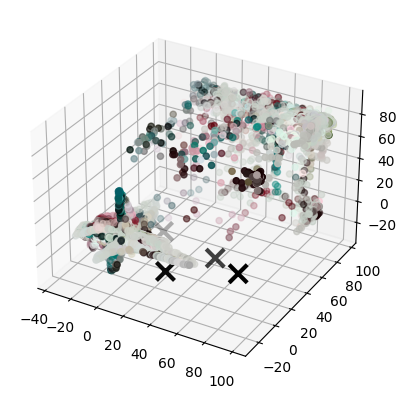

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(lab_img.reshape(3, 155 * 57)[0], lab_img.reshape(3, 155 * 57)[1], lab_img.reshape(3, 155 * 57)[2], c = RGB_img.reshape(155 * 57, 3) / 255)
ax.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 

In [17]:
rgb_centroids = (cv2.cvtColor(centroids.reshape(1, 4, 3), cv2.COLOR_LAB2RGB)).reshape(4, 3)

In [18]:
rgb_centroids

array([[0.63153636, 0.5755938 , 0.57647496],
       [0.25176314, 0.12271209, 0.12968445],
       [0.8058768 , 0.82540107, 0.8000827 ],
       [0.20632116, 0.43349442, 0.39320275]], dtype=float32)

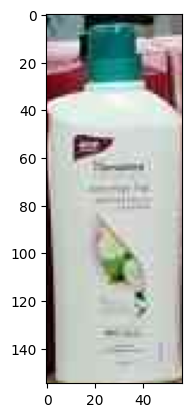

In [27]:
plt.imshow(cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB))

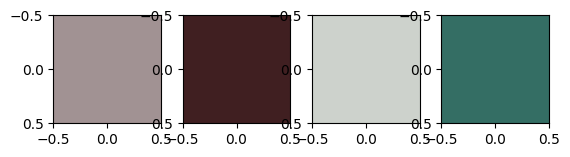

In [26]:
f, axs = plt.subplots(1, k)
for i, ax in enumerate(axs):
    ax.imshow(rgb_centroids[i].reshape(1, 1, 3), vmin = 0, vmax = 1)
f.show()

In [38]:
labels = kmeans_cluster.labels_

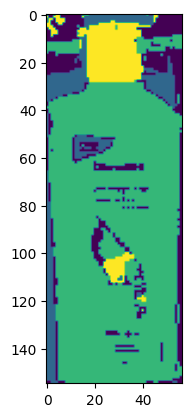

In [37]:
plt.imshow(kmeans_cluster.labels_.reshape(155, 57))

(array([1246.,    0.,    0.,  824.,    0.,    0., 6054.,    0.,    0.,
         711.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

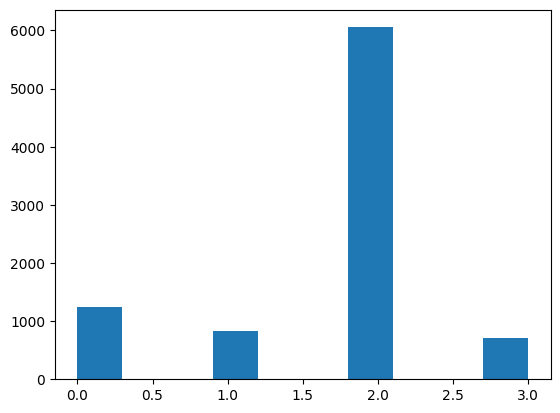

In [39]:
plt.hist(labels)

In [57]:
from sklearn.cluster import KMeans 
def color_palette(img_dir, k):
    img = cv2.imread(img_dir)
    lab_img = cv2.cvtColor(img.astype("float32") / 255, cv2.COLOR_BGR2LAB)
    kmeans_cluster = KMeans(n_clusters = k, n_init = 10)
    kmeans_cluster.fit(lab_img.reshape(lab_img.shape[0] * lab_img.shape[1], 3))
    centroids = kmeans_cluster.cluster_centers_
    rgb_centroids = (cv2.cvtColor(centroids.reshape(1, k, 3), cv2.COLOR_LAB2RGB)).reshape(k, 3)
    labels = kmeans_cluster.labels_
    return rgb_centroids, labels

In [60]:
def display_palette(centroids):
    fig, axs = plt.subplots(1, len(centroids))
    for i, ax in enumerate(axs):
        ax.imshow(centroids[i].reshape(1, 1, 3), vmin = 0, vmax = 1)
    fig.show()

In [64]:
def display_segmentation(img_dir, labels):
    img = cv2.imread(img_dir)
    plt.imshow(labels.reshape(img.shape[0], img.shape[1]))

In [66]:
def display_histogram(labels):
    plt.hist(labels)

In [61]:
img_dir = '/kaggle/input/test-himalaya-img/46_QS2817970_AddVisibilityImg-20240423_101925.jpg14216.png'
centroids, labels = color_palette(img_dir, 5)

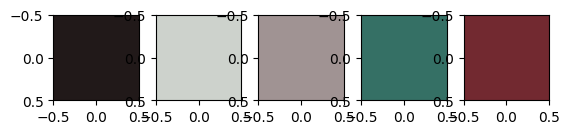

In [62]:
display_palette(centroids)

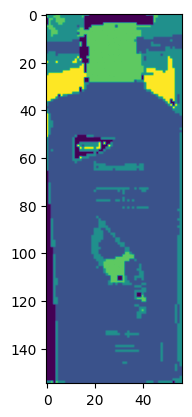

In [65]:
display_segmentation(img_dir, labels)

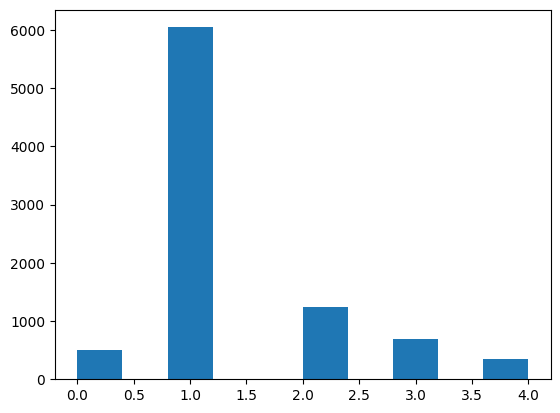

In [67]:
display_histogram(labels)